In [2]:
import numpy as np
from scipy import ndimage
import cv2
import matplotlib.pyplot as plt

In [22]:
img=cv2.imread("Horse.png")
cv2.imshow('img',img)
seg_mask=cv2.imread("HorseMask.png")
max_size = 500
img = cv2.resize(img, (max_size, max_size), interpolation=cv2.INTER_AREA)
seg_mask = cv2.resize(seg_mask, (max_size, max_size), interpolation=cv2.INTER_AREA)

In [23]:
def one_point_boundary_smoothing(img, seg_mask, sigma):
    # Create distance transform of segmentation mask
    dist_mask = ndimage.distance_transform_edt(seg_mask)

    # Compute weights for each pixel
    weights = np.exp(-dist_mask**2 / (2 * sigma**2))

    # Normalize weights for each pixel
    weights /= np.sum(weights, axis=2, keepdims=True)

    # Apply weighted average to each pixel on the boundary
    smoothed = np.zeros_like(img, dtype=np.float64)
    for c in range(img.shape[2]):
        for i in range(img.shape[0]):
            for j in range(img.shape[1]):
                if seg_mask[i,j,c] == 0:
                    smoothed[i,j,c] = np.sum(weights[i,j,:] * img[i,j,:])
                else:
                    smoothed[i,j,c] = img[i,j,c]

    return smoothed.astype(np.uint8)

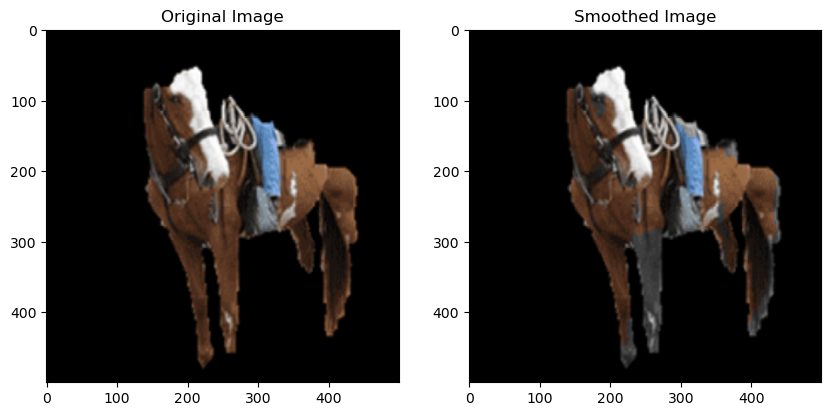

In [28]:
smoothed_img = one_point_boundary_smoothing(img, seg_mask, sigma=300)

# Display the original and smoothed images side by side
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(cv2.cvtColor(smoothed_img, cv2.COLOR_BGR2RGB))
ax[1].set_title('Smoothed Image')
plt.show()